# 1. Import Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# 2. Load data

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,6.0,,C2,153 AVENUE B,,10009.0,5.0,0.0,5.0,1633,6440,1900.0,2.0,C2,6625000,2017-07-19 00:00:00
1,5,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,,C7,234 EAST 4TH STREET,,10009.0,28.0,3.0,31.0,4616,18690,1900.0,2.0,C7,-,2016-12-14 00:00:00
2,6,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39.0,,C7,197 EAST 3RD STREET,,10009.0,16.0,1.0,17.0,2212,7803,1900.0,2.0,C7,-,2016-12-09 00:00:00
3,7,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402.0,21.0,,C4,154 EAST 7TH STREET,,10009.0,10.0,0.0,10.0,2272,6794,1913.0,2.0,C4,3936272,2016-09-23 00:00:00
4,8,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404.0,55.0,,C2,301 EAST 10TH STREET,,10009.0,6.0,0.0,6.0,2369,4615,1900.0,2.0,C2,8000000,2016-11-17 00:00:00


In [36]:
print('Shape of the original data: ',df.shape)

Size of the original data:  (84548, 22)


Information about the data type of each column and the null values

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  object 
 1   BOROUGH                         67830 non-null  float64
 2   NEIGHBORHOOD                    67830 non-null  object 
 3   BUILDING CLASS CATEGORY         67830 non-null  object 
 4   TAX CLASS AT PRESENT            67830 non-null  object 
 5   BLOCK                           67830 non-null  float64
 6   LOT                             67830 non-null  float64
 7   EASE-MENT                       67830 non-null  object 
 8   BUILDING CLASS AT PRESENT       67830 non-null  object 
 9   ADDRESS                         67830 non-null  object 
 10  APARTMENT NUMBER                67830 non-null  object 
 11  ZIP CODE                        67830 non-null  float64
 12  RESIDENTIAL UNITS               

We take just the columns BOROUGH and NEIGHBORHOOD of our dataframe original. If we take just this columns we are going to have the 67860 non-null values

# 2. Data cleaning

In [37]:
df_clean = df[['BOROUGH','NEIGHBORHOOD']]
print('Shape of the clean data: ',df_clean.shape)
df_clean.head()

Shape of the clean data:  (84548, 2)


,BOROUGH,NEIGHBORHOOD
0,1.0,ALPHABET CITY
1,1.0,ALPHABET CITY
2,1.0,ALPHABET CITY
3,1.0,ALPHABET CITY
4,1.0,ALPHABET CITY


We are going to work just with the first BOROUGH (1=Manhattan), so we filter and group by neighborhood and count how many houses were sold and rename the BOROUGH column

In [56]:
df_BOROUGH_1 = df_clean[df_clean['BOROUGH'] == 1.0].groupby('NEIGHBORHOOD').count().rename(columns={'BOROUGH': 'HOUSES SOLD'})
df_BOROUGH_1

,HOUSES SOLD
NEIGHBORHOOD,
ALPHABET CITY,139
CHELSEA,487
CHINATOWN,114
CIVIC CENTER,296
CLINTON,278
EAST VILLAGE,105
FASHION,92
FINANCIAL,470
FLATIRON,345


In [57]:
df_BOROUGH_1 = df_BOROUGH_1.reset_index()
df_BOROUGH_1.head()

,NEIGHBORHOOD,HOUSES SOLD
0,ALPHABET CITY,139
1,CHELSEA,487
2,CHINATOWN,114
3,CIVIC CENTER,296
4,CLINTON,278


We changed the name of the NEIGHBORHOOD 'MIDTOWN CBD', because the geolocation function cannot find it with the CBD and we changed the name of the NEIGHBORHOOD 'WASHINGTON HEIGHTS LOWER' and 'WASHINGTON HEIGHTS UPPER to 'WASHINGTON HEIGHTS', for the same reason, so:

In [58]:
df_BOROUGH_1_mod = df_BOROUGH_1.copy()
for i in range(len(df_BOROUGH_1_mod['NEIGHBORHOOD'])):
    if df_BOROUGH_1_mod['NEIGHBORHOOD'].iloc[i] == 'MIDTOWN CBD':
        df_BOROUGH_1_mod['NEIGHBORHOOD'].iloc[i] = 'MIDTOWN'
    elif (df_BOROUGH_1_mod['NEIGHBORHOOD'].iloc[i] == 'WASHINGTON HEIGHTS LOWER') | (df_BOROUGH_1_mod['NEIGHBORHOOD'].iloc[i] == 'WASHINGTON HEIGHTS UPPER'):
        df_BOROUGH_1_mod['NEIGHBORHOOD'].iloc[i] = 'WASHINGTON HEIGHTS'
    else:
        pass
df_BOROUGH_1_mod

C:\Users\ALEJANDRO\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,NEIGHBORHOOD,HOUSES SOLD
0,ALPHABET CITY,139
1,CHELSEA,487
2,CHINATOWN,114
3,CIVIC CENTER,296
4,CLINTON,278
5,EAST VILLAGE,105
6,FASHION,92
7,FINANCIAL,470
8,FLATIRON,345
9,GRAMERCY,167


we look for the geographical coordinates of the neighborhoods

# 3. Get latitude and longitude

In [60]:
Columns = ['NEIGHBORHOOD', 'LATITUDE', 'LONGITUDE']
df_geo = pd.DataFrame(columns = Columns)
for NEIGHBORHOOD in df_BOROUGH_1_mod['NEIGHBORHOOD']:
    address = NEIGHBORHOOD+', New York'
    print(address)
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude =location.latitude
    longitude = location.longitude
    df_geo = df_geo.append({'NEIGHBORHOOD':NEIGHBORHOOD, 'LATITUDE':latitude, 'LONGITUDE': longitude}, ignore_index=True)

df_geo.head()

ALPHABET CITY, New York
CHELSEA, New York
CHINATOWN, New York
CIVIC CENTER, New York
CLINTON, New York
EAST VILLAGE, New York
FASHION, New York
FINANCIAL, New York
FLATIRON, New York
GRAMERCY, New York
GREENWICH VILLAGE-CENTRAL, New York
GREENWICH VILLAGE-WEST, New York
HARLEM-CENTRAL, New York
HARLEM-EAST, New York
HARLEM-UPPER, New York
HARLEM-WEST, New York
INWOOD, New York
JAVITS CENTER, New York
KIPS BAY, New York
LITTLE ITALY, New York
LOWER EAST SIDE, New York
MANHATTAN VALLEY, New York
MIDTOWN, New York
MIDTOWN EAST, New York
MIDTOWN WEST, New York
MORNINGSIDE HEIGHTS, New York
MURRAY HILL, New York
ROOSEVELT ISLAND, New York
SOHO, New York
SOUTHBRIDGE, New York
TRIBECA, New York
UPPER EAST SIDE (59-79), New York
UPPER EAST SIDE (79-96), New York
UPPER EAST SIDE (96-110), New York
UPPER WEST SIDE (59-79), New York
UPPER WEST SIDE (79-96), New York
UPPER WEST SIDE (96-116), New York
WASHINGTON HEIGHTS, New York
WASHINGTON HEIGHTS, New York


,NEIGHBORHOOD,LATITUDE,LONGITUDE
0,ALPHABET CITY,40.725102,-73.979583
1,CHELSEA,40.746491,-74.001528
2,CHINATOWN,40.716491,-73.996250
3,CIVIC CENTER,40.713679,-74.002404
4,CLINTON,43.048403,-75.378503


we merge the dataframe with the houses sold with their coordinates

In [73]:
df_merge = pd.merge(df_BOROUGH_1_mod, df_geo, on='NEIGHBORHOOD')
df_merge

,NEIGHBORHOOD,HOUSES SOLD,LATITUDE,LONGITUDE
0,ALPHABET CITY,139,40.725102,-73.979583
1,CHELSEA,487,40.746491,-74.001528
2,CHINATOWN,114,40.716491,-73.996250
3,CIVIC CENTER,296,40.713679,-74.002404
4,CLINTON,278,43.048403,-75.378503
5,EAST VILLAGE,105,40.729269,-73.987361
6,FASHION,92,40.747116,-73.994602
7,FINANCIAL,470,40.707612,-74.009378
8,FLATIRON,345,40.741059,-73.989642
9,GRAMERCY,167,40.735519,-73.984079


If we look at the dataframe we can see that there are coordinates that are duplicated with different neighborhood, since the geolocator does not distinguish those cases. Therefore, we will add the houses and leave a global neighborhood for those cases: 
* UPPER EAST SIDE 
* UPPER WEST SIDE
* WASHINGTON HEIGHTS	

# 4. Second data cleaning

In [85]:
df_merge_mod = df_merge.copy()
UPPER_EAST_SIDE_sum = df_merge['HOUSES SOLD'].iloc[31] + df_merge['HOUSES SOLD'].iloc[32] + df_merge['HOUSES SOLD'].iloc[33]
UPPER_EAST_SIDE_lat = df_merge['LATITUDE'].iloc[31]
UPPER_EAST_SIDE_lon = df_merge['LONGITUDE'].iloc[31]
UPPER_WEST_SIDE_sum = df_merge['HOUSES SOLD'].iloc[34] + df_merge['HOUSES SOLD'].iloc[35] + df_merge['HOUSES SOLD'].iloc[36]
UPPER_WEST_SIDE_lat = df_merge['LATITUDE'].iloc[34]
UPPER_WEST_SIDE_lon = df_merge['LONGITUDE'].iloc[34]
WASHINGTON_HEIGHTS_sum = df_merge['HOUSES SOLD'].iloc[37] + df_merge['HOUSES SOLD'].iloc[38]
WASHINGTON_HEIGHTS_lat = df_merge['LATITUDE'].iloc[37]
WASHINGTON_HEIGHTS_lon = df_merge['LONGITUDE'].iloc[38]
df_merge_mod = df_merge_mod.iloc[0:31]
df_merge_mod = df_merge_mod.append({'NEIGHBORHOOD':'UPPER EAST SIDE','HOUSES SOLD':UPPER_EAST_SIDE_sum, 'LATITUDE':UPPER_EAST_SIDE_lat, 'LONGITUDE':UPPER_EAST_SIDE_lon}, ignore_index=True)
df_merge_mod = df_merge_mod.append({'NEIGHBORHOOD':'UPPER WEST SIDE','HOUSES SOLD':UPPER_WEST_SIDE_sum, 'LATITUDE':UPPER_WEST_SIDE_lat, 'LONGITUDE':UPPER_WEST_SIDE_lon},ignore_index=True)
df_merge_mod = df_merge_mod.append({'NEIGHBORHOOD':'WASHINGTON HEIGHTS','HOUSES SOLD':WASHINGTON_HEIGHTS_sum , 'LATITUDE':WASHINGTON_HEIGHTS_lat, 'LONGITUDE':WASHINGTON_HEIGHTS_lon},ignore_index=True)
df_merge_mod

,NEIGHBORHOOD,HOUSES SOLD,LATITUDE,LONGITUDE
0,ALPHABET CITY,139,40.725102,-73.979583
1,CHELSEA,487,40.746491,-74.001528
2,CHINATOWN,114,40.716491,-73.996250
3,CIVIC CENTER,296,40.713679,-74.002404
4,CLINTON,278,43.048403,-75.378503
5,EAST VILLAGE,105,40.729269,-73.987361
6,FASHION,92,40.747116,-73.994602
7,FINANCIAL,470,40.707612,-74.009378
8,FLATIRON,345,40.741059,-73.989642
9,GRAMERCY,167,40.735519,-73.984079


In [87]:
map_BOROUGH_1_NY = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, hsold, neighborhood in zip(df_merge_mod['LATITUDE'], df_merge_mod['LONGITUDE'], df_merge_mod['HOUSES SOLD'], df_merge_mod['NEIGHBORHOOD']):
    label = '{}, {}'.format(neighborhood, hsold)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_BOROUGH_1_NY)      
map_BOROUGH_1_NY

we look at the map we can see that there are some neighborhoods that are very far away, and that perhaps are not part of Borough 1, so we removed them:
* Clinton
* Javits Center
* Murray Hill

In [88]:
df_merge_mod = df_merge_mod.drop([4,17,26], axis=0).reset_index(drop=True)
df_merge_mod 

,NEIGHBORHOOD,HOUSES SOLD,LATITUDE,LONGITUDE
0,ALPHABET CITY,139,40.725102,-73.979583
1,CHELSEA,487,40.746491,-74.001528
2,CHINATOWN,114,40.716491,-73.996250
3,CIVIC CENTER,296,40.713679,-74.002404
4,EAST VILLAGE,105,40.729269,-73.987361
5,FASHION,92,40.747116,-73.994602
6,FINANCIAL,470,40.707612,-74.009378
7,FLATIRON,345,40.741059,-73.989642
8,GRAMERCY,167,40.735519,-73.984079
9,GREENWICH VILLAGE-CENTRAL,247,40.733584,-74.002817


In [89]:
map_BOROUGH_1_NY = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, hsold, neighborhood in zip(df_merge_mod['LATITUDE'], df_merge_mod['LONGITUDE'], df_merge_mod['HOUSES SOLD'], df_merge_mod['NEIGHBORHOOD']):
    label = '{}, {}'.format(neighborhood, hsold)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_BOROUGH_1_NY)      
map_BOROUGH_1_NY

We establish our credencies to communicate with the FOURSQUARE API

# 4. Get venues for every neighborhood

In [157]:
CLIENT_ID = 'YOUR CLIENT_ID ' # your Foursquare ID
CLIENT_SECRET = 'YOUR CLIENT_SECRET' # your Foursquare Secret
VERSION = '20200601' #year
LIMIT = 100
radius = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YOUR CLIENT_ID 
CLIENT_SECRET:YOUR CLIENT_SECRET


In [91]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

We get venues for each of the neighborhoods

In [92]:
BOROUGH_1_NY_venues = getNearbyVenues(names=df_merge_mod['NEIGHBORHOOD'],
                                      latitudes=df_merge_mod['LATITUDE'],
                                      longitudes=df_merge_mod['LONGITUDE']
                                      )

ALPHABET CITY
CHELSEA
CHINATOWN
CIVIC CENTER
EAST VILLAGE
FASHION
FINANCIAL
FLATIRON
GRAMERCY
GREENWICH VILLAGE-CENTRAL
GREENWICH VILLAGE-WEST
HARLEM-CENTRAL
HARLEM-EAST
HARLEM-UPPER
HARLEM-WEST
INWOOD
KIPS BAY
LITTLE ITALY
LOWER EAST SIDE
MANHATTAN VALLEY
MIDTOWN
MIDTOWN EAST
MIDTOWN WEST
MORNINGSIDE HEIGHTS
ROOSEVELT ISLAND
SOHO
SOUTHBRIDGE
TRIBECA
UPPER EAST SIDE
UPPER WEST SIDE
WASHINGTON HEIGHTS


We group venues by neighborhood

In [93]:
BOROUGH_1_NY_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ALPHABET CITY,100,100,100,100,100,100
CHELSEA,89,89,89,89,89,89
CHINATOWN,100,100,100,100,100,100
CIVIC CENTER,75,75,75,75,75,75
EAST VILLAGE,100,100,100,100,100,100
FASHION,100,100,100,100,100,100
FINANCIAL,100,100,100,100,100,100
FLATIRON,87,87,87,87,87,87
GRAMERCY,100,100,100,100,100,100


In [94]:
print('There are {} uniques categories.'.format(len(BOROUGH_1_NY_venues['Venue Category'].unique())))

There are 285 uniques categories.


We create a new DataFrame where we go from categorical variables to numeric by means of dummies variables

In [95]:
# one hot encoding
BOROUGH_1_NY_onehot = pd.get_dummies(BOROUGH_1_NY_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
BOROUGH_1_NY_onehot['Neighborhood'] = BOROUGH_1_NY_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [BOROUGH_1_NY_onehot.columns[-1]] + list(BOROUGH_1_NY_onehot.columns[:-1])
Toronto_onehot = BOROUGH_1_NY_onehot[fixed_columns]

BOROUGH_1_NY_onehot.head()

,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Beer Bar,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Synagogue,Szechuan Restaurant,TV Station,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Turkish Restaurant,Ukrainian

We group the new matrix by neighborhood and calculate the average for each type of venue.

In [96]:
BOROUGH_1_NY_grouped = BOROUGH_1_NY_onehot.groupby('Neighborhood').mean().reset_index()
BOROUGH_1_NY_grouped

,Neighborhood,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Beer Bar,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Synagogue,Szechuan Restaurant,TV Station,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Turkish Restaur

We show the first 5 venues from each neighborhood

In [97]:
num_top_venues = 5

for hood in BOROUGH_1_NY_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = BOROUGH_1_NY_grouped[BOROUGH_1_NY_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ALPHABET CITY----
          venue  freq
0  Cocktail Bar  0.09
1           Bar  0.05
2      Wine Bar  0.04
3   Coffee Shop  0.03
4        Garden  0.03


----CHELSEA----
                 venue  freq
0          Art Gallery  0.38
1                 Café  0.03
2  American Restaurant  0.02
3           Bagel Shop  0.02
4      Thai Restaurant  0.02


----CHINATOWN----
                   venue  freq
0     Chinese Restaurant  0.11
1                 Bakery  0.08
2        Bubble Tea Shop  0.05
3  Vietnamese Restaurant  0.04
4         Sandwich Place  0.04


----CIVIC CENTER----
                venue  freq
0  Chinese Restaurant  0.11
1     Bubble Tea Shop  0.05
2        Dessert Shop  0.04
3                Park  0.04
4  Dim Sum Restaurant  0.04


----EAST VILLAGE----
                 venue  freq
0  Japanese Restaurant  0.06
1         Dessert Shop  0.05
2        Grocery Store  0.05
3          Pizza Place  0.05
4                  Bar  0.03


----FASHION----
                  venue  freq
0           

In [99]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

We show the first 10 most common venues by neighborhood but already as a categorical variable

In [100]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = BOROUGH_1_NY_grouped['Neighborhood']

for ind in np.arange(BOROUGH_1_NY_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(BOROUGH_1_NY_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALPHABET CITY,Cocktail Bar,Bar,Wine Bar,Coffee Shop,Garden,Italian Restaurant,Salon / Barbershop,Pizza Place,Beer Bar,Bookstore
1,CHELSEA,Art Gallery,Café,Gym / Fitness Center,Thai Restaurant,Ice Cream Shop,Grocery Store,Park,Coffee Shop,Bagel Shop,American Restaurant
2,CHINATOWN,Chinese Restaurant,Bakery,Bubble Tea Shop,Sandwich Place,Salon / Barbershop,Vietnamese Restaurant,Spa,Ice Cream Shop,Optical Shop,Cocktail Bar
3,CIVIC CENTER,Chinese Restaurant,Bubble Tea Shop,Dim Sum Restaurant,Park,Coffee Shop,Dessert Shop,Gym,Optical Shop,Cocktail Bar,Cantonese Restaurant
4,EAST VILLAGE,Japanese Restaurant,Grocery Store,Dessert Shop,Pizza Place,Bar,Vietnamese Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Coffee Shop


# 5. Creation model for cluster

We create our model and adjust the data to get the clusters

In [101]:
# set number of clusters
kclusters = 5

BOROUGH_1_NY_grouped_clustering = BOROUGH_1_NY_grouped.drop(["Neighborhood"], 1)

# run k-means clustering
kmeans = KMeans(init="k-means++",n_clusters=kclusters, random_state=0).fit(BOROUGH_1_NY_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 2, 0, 0, 2, 2, 2, 0, 0])

We rename to join the tables

In [102]:
neighborhoods_venues_sorted.rename(columns={'Neighborhood':'NEIGHBORHOOD'}, inplace=True)

We join the initial information table (neighborhood, houses sold, latitude, longitude) with the table of the main venues

In [103]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

BOROUGH_1_NY_merged = df_merge_mod

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
BOROUGH_1_NY_merged = BOROUGH_1_NY_merged.join(neighborhoods_venues_sorted.set_index('NEIGHBORHOOD'), on='NEIGHBORHOOD')

BOROUGH_1_NY_merged.head() # check the last columns!

,NEIGHBORHOOD,HOUSES SOLD,LATITUDE,LONGITUDE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALPHABET CITY,139,40.725102,-73.979583,0,Cocktail Bar,Bar,Wine Bar,Coffee Shop,Garden,Italian Restaurant,Salon / Barbershop,Pizza Place,Beer Bar,Bookstore
1,CHELSEA,487,40.746491,-74.001528,1,Art Gallery,Café,Gym / Fitness Center,Thai Restaurant,Ice Cream Shop,Grocery Store,Park,Coffee Shop,Bagel Shop,American Restaurant
2,CHINATOWN,114,40.716491,-73.996250,2,Chinese Restaurant,Bakery,Bubble Tea Shop,Sandwich Place,Salon / Barbershop,Vietnamese Restaurant,Spa,Ice Cream Shop,Optical Shop,Cocktail Bar
3,CIVIC CENTER,296,40.713679,-74.002404,0,Chinese Restaurant,Bubble Tea Shop,Dim Sum Restaurant,Park,Coffee Shop,Dessert Shop,Gym,Optical Shop,Cocktail Bar,Cantonese Restaurant
4,EAST VILLAGE,105,40.729269,-73.987361,0,Japanese Restaurant,Grocery Store,Dessert Shop,Pizza Place,Bar,Vietnamese Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Coffee Shop


Map of neighborhoods with their respective cluster

In [104]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BOROUGH_1_NY_merged['LATITUDE'], BOROUGH_1_NY_merged['LONGITUDE'], BOROUGH_1_NY_merged['NEIGHBORHOOD'], BOROUGH_1_NY_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)       
map_clusters

### Cluster 1

In [152]:
BOROUGH_1_NY_merged.loc[BOROUGH_1_NY_merged['Cluster Labels'] == 0, BOROUGH_1_NY_merged.columns[[0,1] + list(range(5, BOROUGH_1_NY_merged.shape[1]))]]

,NEIGHBORHOOD,HOUSES SOLD,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALPHABET CITY,139,Cocktail Bar,Bar,Wine Bar,Coffee Shop,Garden,Italian Restaurant,Salon / Barbershop,Pizza Place,Beer Bar,Bookstore
3,CIVIC CENTER,296,Chinese Restaurant,Bubble Tea Shop,Dim Sum Restaurant,Park,Coffee Shop,Dessert Shop,Gym,Optical Shop,Cocktail Bar,Cantonese Restaurant
4,EAST VILLAGE,105,Japanese Restaurant,Grocery Store,Dessert Shop,Pizza Place,Bar,Vietnamese Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Coffee Shop
8,GRAMERCY,167,Italian Restaurant,American Restaurant,Pizza Place,Bar,Wine Shop,Bagel Shop,Coffee Shop,Spa,Grocery Store,Hotel
9,GREENWICH VILLAGE-CENTRAL,247,American Restaurant,Italian Restaurant,Coffee Shop,Cocktail Bar,Pizza Place,Bakery,Sandwich Place,Speakeasy,Jazz Club,Ice Cream Shop
16,KIPS BAY,303,Bar,Ice Cream Shop,American Restaurant,Bagel Shop,Italian Restaurant,Grocery Store,Coffee Shop,Pizza Place,Yoga Studio,Convenience Store
18,LOWER EAST SIDE,126,Mexican Restaurant,Café,Cocktail Bar,Coffee Shop,American Restaurant,Ice Cream Shop,Sandwich Place,Chinese Restaurant,Bakery,Bar
19,MANHATTAN VALLEY,193,Chinese Restaurant,Coffee Shop,Bar,Yoga Studio,Bistro,Bubble Tea Shop,American Restaurant,Grocery Store,Bagel Shop,Bank
29,UPPER WEST SIDE,1350,American Restaurant,Bar,Coffee Shop,Wine Bar,Dessert Shop,Bakery,Italian Restaurant,Pizza Place,Seafood Restaurant,Bagel Shop


### Cluster 2

In [153]:
BOROUGH_1_NY_merged.loc[BOROUGH_1_NY_merged['Cluster Labels'] == 1, BOROUGH_1_NY_merged.columns[[0,1] + list(range(5, BOROUGH_1_NY_merged.shape[1]))]]

,NEIGHBORHOOD,HOUSES SOLD,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,CHELSEA,487,Art Gallery,Café,Gym / Fitness Center,Thai Restaurant,Ice Cream Shop,Grocery Store,Park,Coffee Shop,Bagel Shop,American Restaurant


### Cluster 3

In [154]:
BOROUGH_1_NY_merged.loc[BOROUGH_1_NY_merged['Cluster Labels'] == 2, BOROUGH_1_NY_merged.columns[[0,1] + list(range(5, BOROUGH_1_NY_merged.shape[1]))]]

,NEIGHBORHOOD,HOUSES SOLD,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,CHINATOWN,114,Chinese Restaurant,Bakery,Bubble Tea Shop,Sandwich Place,Salon / Barbershop,Vietnamese Restaurant,Spa,Ice Cream Shop,Optical Shop,Cocktail Bar
5,FASHION,92,Coffee Shop,Gym / Fitness Center,Hotel,Boxing Gym,Grocery Store,Lounge,Yoga Studio,Bakery,Donut Shop,Miscellaneous Shop
6,FINANCIAL,470,Coffee Shop,Pizza Place,American Restaurant,Gym,Italian Restaurant,Gym / Fitness Center,Steakhouse,Bar,Falafel Restaurant,Juice Bar
7,FLATIRON,345,Japanese Restaurant,Spa,American Restaurant,Gym / Fitness Center,Gym,Café,Italian Restaurant,Mediterranean Restaurant,Cosmetics Shop,Juice Bar
10,GREENWICH VILLAGE-WEST,363,American Restaurant,Coffee Shop,Yoga Studio,Steakhouse,Ice Cream Shop,Gym / Fitness Center,Italian Restaurant,Sandwich Place,Cocktail Bar,Salad Place
17,LITTLE ITALY,37,Spa,Chinese Restaurant,Ice Cream Shop,Bubble Tea Shop,Mediterranean Restaurant,Bakery,Italian Restaurant,Thai Restaurant,Pizza Place,Sandwich Place
20,MIDTOWN,154,Hotel,Indian Restaurant,Food & Drink Shop,Theater,Sushi Restaurant,Hotel Bar,Art Museum,Vegetarian / Vegan Restaurant,Steakhouse,Plaza
21,MIDTOWN EAST,671,Hotel,Coffee Shop,Salon / Barbershop,Boutique,Art Museum,Gym / Fitness Center,Jewelry Store,Sandwich Place,Chinese Restaurant,Spa
24,ROOSEVELT ISLAND,19,Baseball Field,Park,Playground,Scenic Lookout,Restaurant,Dog Run,Liquor Store,Supermarket,Sandwich Place,School
25,SOHO,205,Italian Restaurant,Mediterranean Restaurant,Coffee Shop,Sandwich Place,Ice Cream Shop,Bakery,Pizza Place,Cosmetics Shop,Clothing Store,Salon / Barbershop


### Cluster 4

In [155]:
BOROUGH_1_NY_merged.loc[BOROUGH_1_NY_merged['Cluster Labels'] == 3, BOROUGH_1_NY_merged.columns[[0,1] + list(range(5, BOROUGH_1_NY_merged.shape[1]))]]

,NEIGHBORHOOD,HOUSES SOLD,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,HARLEM-CENTRAL,718,Cosmetics Shop,Mobile Phone Shop,Clothing Store,African Restaurant,Burger Joint,Theater,Southern / Soul Food Restaurant,Pizza Place,Mexican Restaurant,French Restaurant
12,HARLEM-EAST,306,Cosmetics Shop,Mobile Phone Shop,Clothing Store,African Restaurant,Burger Joint,Theater,Southern / Soul Food Restaurant,Pizza Place,Mexican Restaurant,French Restaurant
13,HARLEM-UPPER,97,Cosmetics Shop,Mobile Phone Shop,Clothing Store,African Restaurant,Burger Joint,Theater,Southern / Soul Food Restaurant,Pizza Place,Mexican Restaurant,French Restaurant
14,HARLEM-WEST,14,Cosmetics Shop,Mobile Phone Shop,Clothing Store,African Restaurant,Burger Joint,Theater,Southern / Soul Food Restaurant,Pizza Place,Mexican Restaurant,French Restaurant


### Cluster 5

In [156]:
BOROUGH_1_NY_merged.loc[BOROUGH_1_NY_merged['Cluster Labels'] == 4, BOROUGH_1_NY_merged.columns[[0,1] + list(range(5, BOROUGH_1_NY_merged.shape[1]))]]

,NEIGHBORHOOD,HOUSES SOLD,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,INWOOD,50,Café,Mexican Restaurant,Park,Spanish Restaurant,American Restaurant,Wine Shop,Wine Bar,Bakery,Frozen Yogurt Shop,Chinese Restaurant
22,MIDTOWN WEST,746,Mexican Restaurant,Thai Restaurant,Italian Restaurant,Coffee Shop,Theater,Wine Shop,Gym,Wine Bar,Gourmet Shop,Pizza Place
23,MORNINGSIDE HEIGHTS,2,Deli / Bodega,Sandwich Place,Coffee Shop,Mexican Restaurant,Italian Restaurant,Café,Chinese Restaurant,Pharmacy,Park,College Cafeteria
30,WASHINGTON HEIGHTS,156,Pizza Place,Latin American Restaurant,Mexican Restaurant,Bookstore,Chinese Restaurant,Bakery,Coffee Shop,Thai Restaurant,Korean Restaurant,Park


# 6. Conclusion

# Extra analysis

Graph of quantity of house sold in the borough one

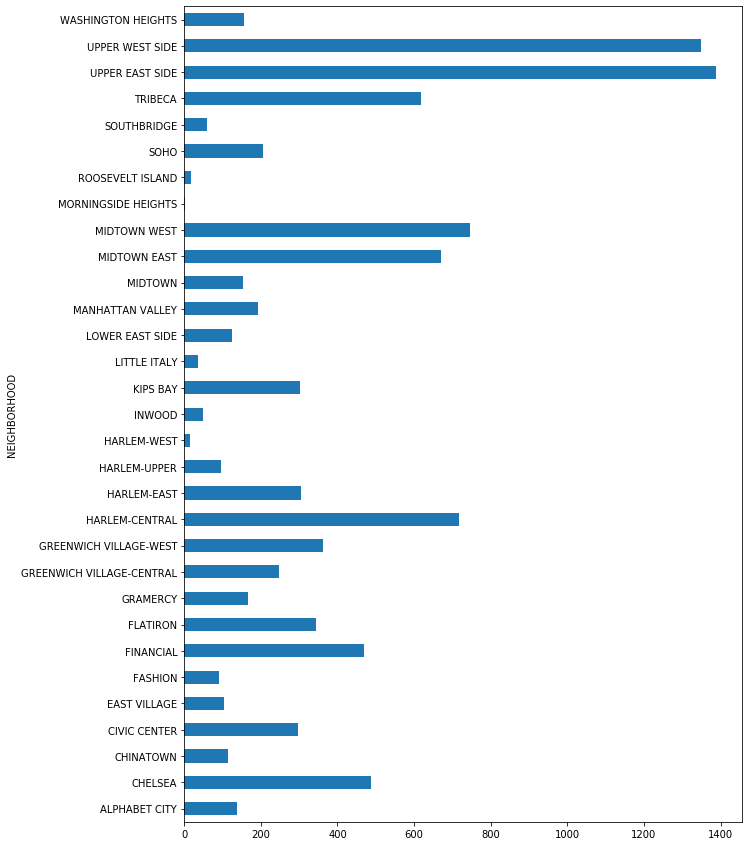

In [119]:
df_extra = df_merge_mod.copy()
df_extra.set_index('NEIGHBORHOOD', inplace=True)
df_extra['HOUSES SOLD'].plot(kind='barh', figsize=(10,15))

The first 5 neighbors with the highest number of houses sold from 2016 to 2017

In [120]:
df_extra['HOUSES SOLD'].sort_values(ascending=False)[0:5]

NEIGHBORHOOD
UPPER EAST SIDE    1387
UPPER WEST SIDE    1350
MIDTOWN WEST        746
HARLEM-CENTRAL      718
MIDTOWN EAST        671
Name: HOUSES SOLD, dtype: int64

We are going to analyze the average price of those houses sold by neighborhood

In [121]:
df_price = df[df['BOROUGH'] == 1.0]
df_price.shape

(10657, 22)

We drop null values

In [123]:
df_price['SALE PRICE'].replace(' -  ', np.nan, inplace=True)
df_price = df_price.dropna()
df_price.shape

(7524, 22)

We link neighborhoods like above for consistent analysis

In [139]:
for i in range(len(df_price['NEIGHBORHOOD'])):
    if df_price['NEIGHBORHOOD'].iloc[i] == 'MIDTOWN CBD':
        df_price['NEIGHBORHOOD'].iloc[i] = 'MIDTOWN'
    elif (df_price['NEIGHBORHOOD'].iloc[i] == 'WASHINGTON HEIGHTS LOWER') | (df_price['NEIGHBORHOOD'].iloc[i] == 'WASHINGTON HEIGHTS UPPER'):
        df_price['NEIGHBORHOOD'].iloc[i] = 'WASHINGTON HEIGHTS'
    elif (df_price['NEIGHBORHOOD'].iloc[i] == 'UPPER EAST SIDE (59-79)') | (df_price['NEIGHBORHOOD'].iloc[i] == 'UPPER EAST SIDE (79-96)') | (df_price['NEIGHBORHOOD'].iloc[i] == 'UPPER EAST SIDE (96-110)'):
         df_price['NEIGHBORHOOD'].iloc[i] = 'UPPER EAST SIDE'
    elif (df_price['NEIGHBORHOOD'].iloc[i] == 'UPPER WEST SIDE (59-79)') | (df_price['NEIGHBORHOOD'].iloc[i] == 'UPPER WEST SIDE (79-96)') | (df_price['NEIGHBORHOOD'].iloc[i] == 'UPPER WEST SIDE (96-116)'):
         df_price['NEIGHBORHOOD'].iloc[i] = 'UPPER WEST SIDE'
    else:
        pass
df_price['NEIGHBORHOOD'].unique()

array(['ALPHABET CITY', 'CHELSEA', 'CHINATOWN', 'CIVIC CENTER', 'CLINTON',
       'EAST VILLAGE', 'FASHION', 'FINANCIAL', 'FLATIRON', 'GRAMERCY',
       'GREENWICH VILLAGE-CENTRAL', 'GREENWICH VILLAGE-WEST',
       'HARLEM-CENTRAL', 'HARLEM-EAST', 'HARLEM-UPPER', 'HARLEM-WEST',
       'INWOOD', 'JAVITS CENTER', 'KIPS BAY', 'LITTLE ITALY',
       'LOWER EAST SIDE', 'MANHATTAN VALLEY', 'MIDTOWN', 'MIDTOWN EAST',
       'MIDTOWN WEST', 'MORNINGSIDE HEIGHTS', 'MURRAY HILL',
       'ROOSEVELT ISLAND', 'SOHO', 'SOUTHBRIDGE', 'TRIBECA',
       'UPPER EAST SIDE', 'UPPER WEST SIDE', 'WASHINGTON HEIGHTS'],
      dtype=object)

Graph of the average price of houses sold in each neighborhood

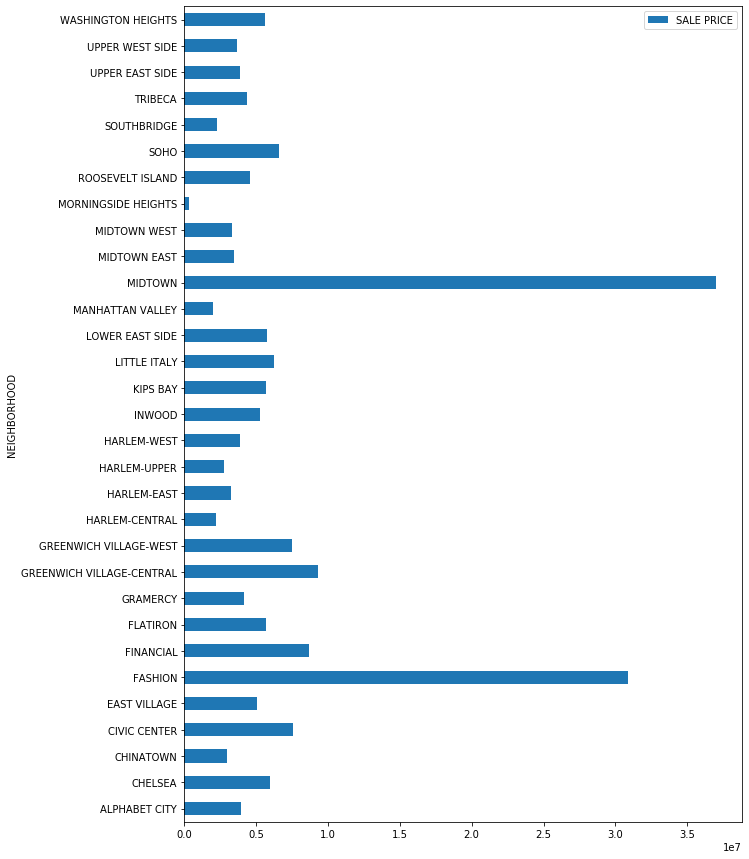

In [147]:
df_price['SALE PRICE'] = df_price['SALE PRICE'].astype('float64')
df_price_NEIGHBORHOOD = df_price.groupby('NEIGHBORHOOD')[['SALE PRICE']].mean()
df_price_NEIGHBORHOOD.drop(['CLINTON','JAVITS CENTER','MURRAY HILL'], axis=0, inplace=True)
df_price_NEIGHBORHOOD.plot(kind='barh', figsize=(10,15))

Top 5 Neighborhoods with Average Price of Most Expensive Homes Sold

In [148]:
df_price_NEIGHBORHOOD.sort_values(by='SALE PRICE',ascending=False)[0:5]

,SALE PRICE
NEIGHBORHOOD,
MIDTOWN,3.697168e+07
FASHION,3.087506e+07
GREENWICH VILLAGE-CENTRAL,9.282142e+06
FINANCIAL,8.673649e+06
CIVIC CENTER,7.594067e+06
